<h1 style="color: #001a79;">Absolute Value Function </h1>
<h2 style="color: #001a79;">Models: Exercise 1.1</h2>
<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

## Absolute Value function $$f(x)=| x |$$

The absolute value | x | of a real number x is the non-negative value of that number. Lets generate numbers from -10 to 10 and plot the absolute value function. Notice how the absolute value is esentially the distance from zero, that is to say that -10 and abs(-10) might be different values but are both 10 units away from 10.

In [1]:
# Import matplotlib.
import matplotlib.pyplot as plt

# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
# generate array of x vals from -10 to 10
x = np.arange(-10, 11, 1.0)

# get absolute of x array (flip of negative signs to positive)
y = np.absolute(x)

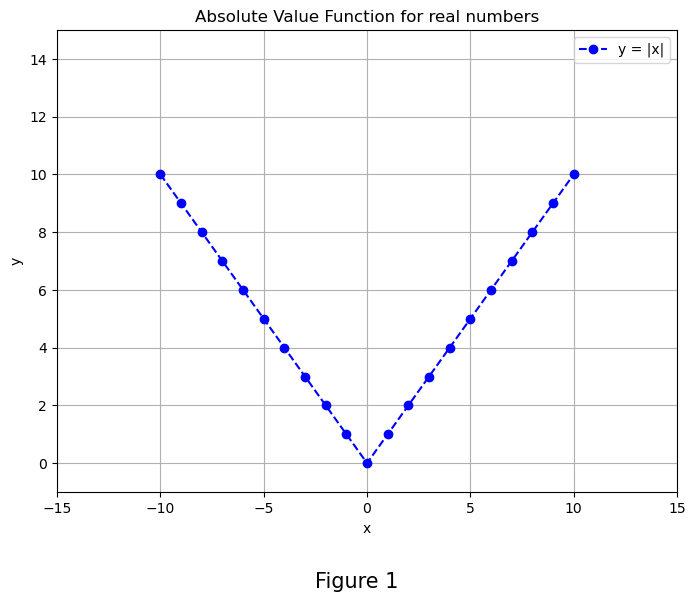

In [3]:
# plot x vals and corresponding y vals
plt.figtext(0.5, -0.05, 'Figure 1', wrap = True, horizontalalignment = 'center', fontsize = 15);
plt.plot(x, y, '--bo', label = "y = |x|")
plt.title("Absolute Value Function for real numbers")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-15, 15])
plt.ylim([-1, 15])
plt.legend()
plt.grid()
plt.show()

## Issues faced using absolute value function

Before exploring the absolute value funcion and why it's typically not used as a cost function for linear regression lets discuss the square function which is more commonly used (as mean squared error MSE). As detailed by Wickramarachchi (2020), we can leverage differential calculus equations to caclulate the minima for this function, where at this point the lines slope and y-intercept best fit the data for that model. Derivatives are used to describe the rate of change of a function with respect to a variable [1]. The idea is to monitor the rate of change of a variable of interest (e.g MSE) and retain the slope and y-intercept values where the cost parameter is at it's lowest point within a gradient descent function (i.e global minima). The MSE cost function has a pre-defined derivation equations for its gradient descent whearas the mean absolute error cost function does not. Looking at plots below helps show us why f(x) = |x| is not differentible as x = 0, where the value of x abruply changes which typically is a hallmark of a point of non-differentiability on a continuous function [2].

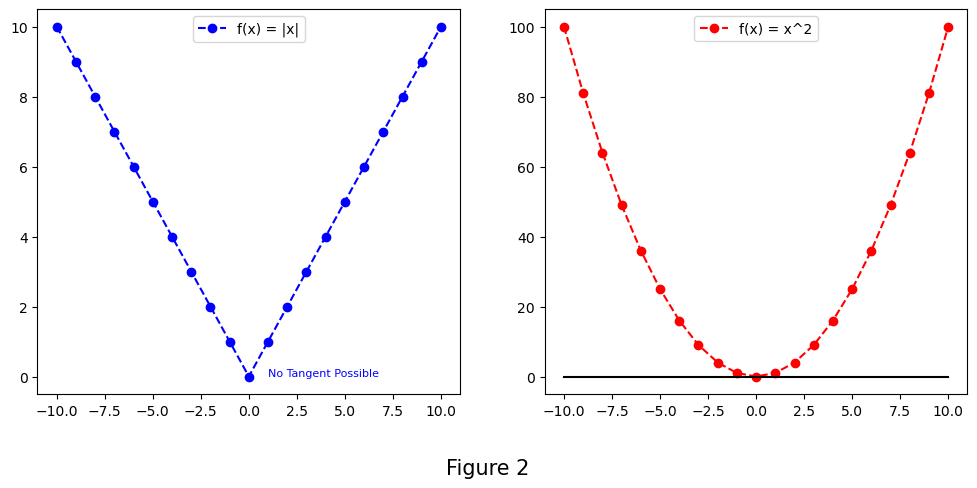

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
plt.figtext(0.5, -0.05, 'Figure 2', wrap = True, horizontalalignment = 'center', fontsize = 15);

# plot absolute vs square function with tangent lines
ax1.text(1, 0, 'No Tangent Possible', fontsize = 8,  color = 'blue')
ax1.plot(x, np.absolute(x), '--bo', label = "f(x) = |x|")
ax2.plot(x, np.square(x), '--ro', label = "f(x) = x^2")
ax2.plot(x, np.repeat(0, 21), '-k')
ax1.legend(loc = 9)
ax2.legend(loc = 9)
plt.show();

Although the mean squared error is typically used, one may still want to solve for the slope and y-intercept values that result in your models line of best fit via optimising the mean absolute error (MAE). The MAE cost method is more robust than MSE with regards to outliers as squaring errors will punish the overall line of best fit more [3]. One can take a linear approach to solve for the best line computationally, lets explore this further.

In [5]:
def get_mae_optimal_vals(xvals, yvals):
    '''returns a dictionary of optimal mean abs error, m and c value'''
    
    optimal_vals = {'MAE': 1000000, 'm': 0, 'c': 0}

    # loop from 3 to 6 (steps of 0.1) based on slope benchmark calc
    # (y2-y1) / (x2-x1)
    for m in np.arange(3, 6.1, 0.1):

        # loop potential c vals from -10 to 10 (steps of 0.1) as y-intercept looks in this range
        for c in np.arange(-10, 11, 0.1):

            mae_val = 0
            # look x-range
            for i in range(len(xvals)):    
                # get absolute diff of x and y theoretical 
                mae_val += abs(yvals[i] - (m * xvals[i] + c))

            # error = summed mae / n
            error = mae_val / len(xvals) 
            
            # update dict if error < current dict val
            if error < optimal_vals['MAE']:
                optimal_vals.update({'MAE': error, 'm': m, 'c': c})
                
    return optimal_vals

In [6]:
# linear approach to solving for best fit line via Mean Asbolute Error
xvals = np.arange(0.0, 21.0, 1.0)
yvals = 5.0 * xvals + 10.0 + np.random.normal(0.0, 5, xvals.size)

optimal_mae_vals = get_mae_optimal_vals(xvals, yvals)
print("The best predicted values are:", optimal_mae_vals)

The best predicted values are: {'MAE': 5.3793136059024524, 'm': 5.200000000000002, 'c': 6.29999999999994}


Lets compare this to the m and c when using Mean Squared Error:

In [7]:
m_mse, c_mse = np.polyfit(xvals, yvals, 1)
print(f'm = {m_mse:.2f}\nc = {c_mse:.2f}')

m = 5.22
c = 8.08


Lets plot the line of best fit generated through both the MSE and MAE error loss functions (see plot 1 below), while also plotting them vs eachother when outliers are present in the data (see plot 2 below). Not surprinsingly plot 1 shows very similar best fit lines, whearas plot 2 shows the red line deviate from the effect of the outlier data points.

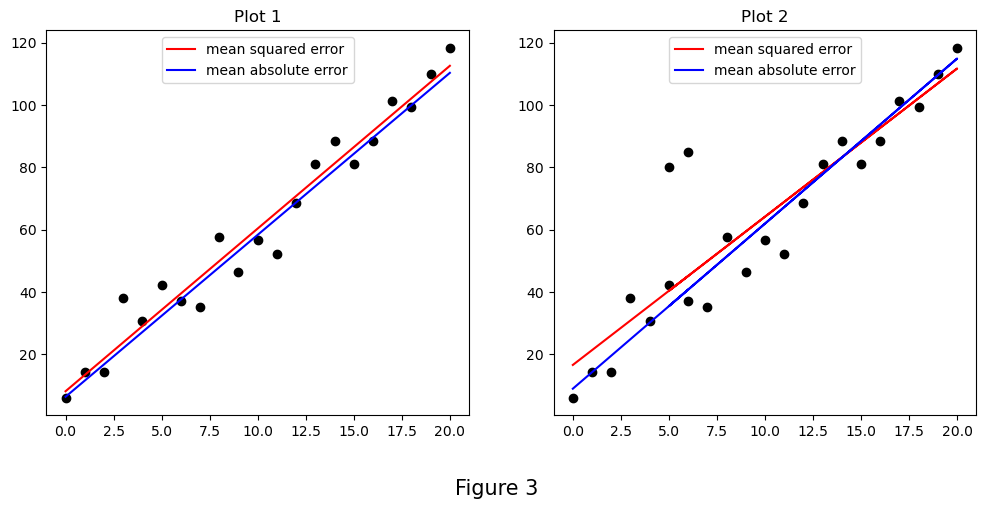

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
plt.figtext(0.5, -0.05, 'Figure 3', wrap = True, horizontalalignment = 'center', fontsize = 15);

# plot y-actual vs y-pred for lines generated via MAE & MSE cost functions
ax1.plot(xvals, yvals, 'ko')
ax1.plot(xvals, m_mse * xvals + c_mse, 'r-', label = r"mean squared error")
ax1.plot(xvals, optimal_mae_vals['m'] * xvals + optimal_mae_vals['c'], 'b-', 
         label = r"mean absolute error")

# add outliers to dataset and recalc optimal mae vals
x_vals_plus_outlier = np.append(xvals, (5, 6))
y_vals_plus_outlier = np.append(yvals, (80 , 85))
optimal_mae_vals = get_mae_optimal_vals(x_vals_plus_outlier, y_vals_plus_outlier)

# plot same as plot 1 but with outliers present in data
m_mse, c_mse = np.polyfit(x_vals_plus_outlier, y_vals_plus_outlier, 1)
ax2.plot(x_vals_plus_outlier, y_vals_plus_outlier, 'ko')
ax2.plot(x_vals_plus_outlier, m_mse * x_vals_plus_outlier + c_mse, 'r-', label = r"mean squared error")
ax2.plot(x_vals_plus_outlier, optimal_mae_vals['m'] * x_vals_plus_outlier + optimal_mae_vals['c'], 'b-', 
         label = r"mean absolute error")

# format the plots
ax1.set_title("Plot 1")
ax2.set_title("Plot 2")
ax1.legend(loc = 9)
ax2.legend(loc = 9)
plt.show();

## References
[1]. Bandgar, S, 2021, Derivatives in Data Science, towards data science, available at [Ref Link.](https://medium.com/nerd-for-tech/derivatives-in-data-science-c5d7bd916f17#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImVlMWI5Zjg4Y2ZlMzE1MWRkZDI4NGE2MWJmOGNlY2Y2NTliMTMwY2YiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NjY1NTExODgsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwOTEzNjcxNDEzNjY4MDk1NDUwMSIsImVtYWlsIjoiY2lhcmFubW9yYW4yN0BnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IkNpYXJhbiBNb3JhbiIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BTG01d3UzS0p0eEN6Uk9ZLS1mNWtpMVprU3VZcEY0dDhYT0ZmU2VTaUJrOD1zOTYtYyIsImdpdmVuX25hbWUiOiJDaWFyYW4iLCJmYW1pbHlfbmFtZSI6Ik1vcmFuIiwiaWF0IjoxNjY2NTUxNDg4LCJleHAiOjE2NjY1NTUwODgsImp0aSI6IjMyYmEzODUxZjM1ZGE4OGZkNzcwZjIxZDI0YjNiZDE3Y2U1YWNkYTMifQ.h22s5RPqtErJdUd_kI0Q9cfyJdu78yr2PK3iok9D63zYqTn2tfUSsXUpXUxkhomaIYQM9Sa1GQQPWh03qlUbZVjdHRBySykdLwvDAEu6KAfvk4lmXo9p-tMDePcdKMVlHBMPTj_QHNfNiQtI0xQGWdzqRWJUlO7mPG9Ztgd6FENfhDfOt9kEGvc3x28qV4EDXbl6gl3CJOMskDZEHZlUL0FHKUZaFLJ9dHISwnFYpNYgvxCniqtJa6aKJBJlDb0lEMo9qTekTRAAsryaQ1-kfoS8v783bOxLQlt7yRbZaOWehAVO1vll8MSJkviReaO0NWjMa2SMOEgKB40jv1O88g)

[2]. Dartmouth College, Differentiability, The Difference Quotient and the Derivative, available at [Ref Link.](https://math.dartmouth.edu/opencalc2/cole/lecture21.pdf)

[3]. Trevisan, V, 2022, Comparing Robustness of MAE, MSE and RMSE, towards data science, available at [Ref Link.](https://towardsdatascience.com/comparing-robustness-of-mae-mse-and-rmse-6d69da870828)




<h2 style="color: #001a79;">End</h2>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;"></i>
